In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/Retail_sales_customer_shopping_data.csv")

In [5]:
data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales_amount
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [6]:
data['sales_amount'] = data['quantity'] * data['price']

In [7]:
data["sales_amount"]

,sales_amount
0,7502.00
1,5401.53
2,300.08
3,15004.25
4,242.40
...,...
99452,293.25
99453,20.92
99454,20.92
99455,16800.00


In [8]:
# Step 2: Aggregate sales data by region (shopping mall) and calculate the total sales for each region
region_sales = data.groupby('shopping_mall')['sales_amount'].sum().sort_values(ascending=False)


In [9]:
region_sales

,sales_amount
shopping_mall,
Mall of Istanbul,50872481.68
Kanyon,50554231.10
Metrocity,37302787.33
Metropol AVM,25379913.19
Istinye Park,24618827.68
Zorlu Center,12901053.82
Cevahir AVM,12645138.20
Viaport Outlet,12521339.72
Emaar Square Mall,12406100.29


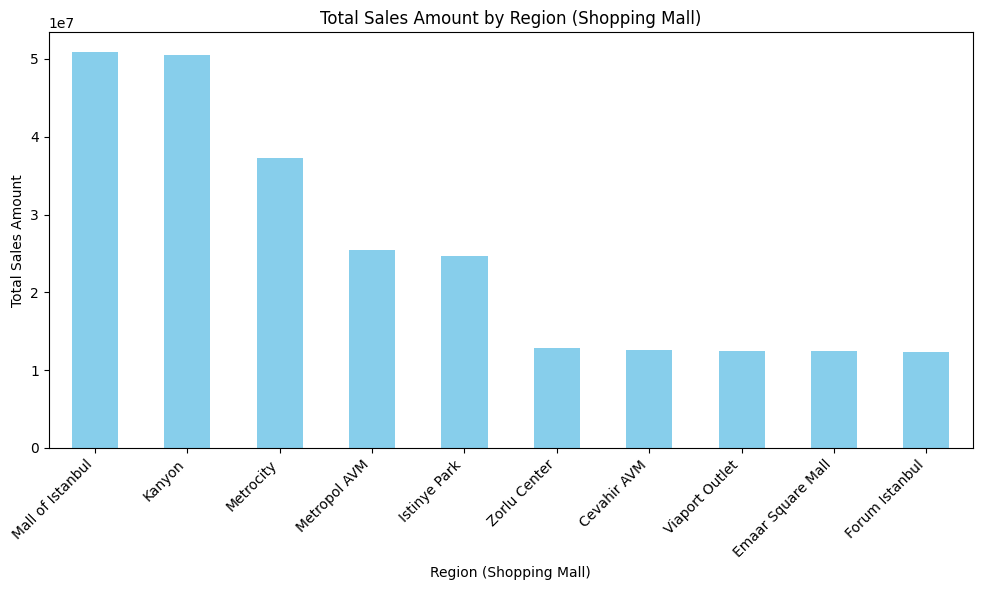

In [10]:
# Step 3: Plot total sales by region
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales Amount by Region (Shopping Mall)')
plt.xlabel('Region (Shopping Mall)')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [11]:

# Step 4: Display the top-performing regions
print("Top-performing regions by total sales amount:")
print(region_sales.head())

Top-performing regions by total sales amount:
shopping_mall
Mall of Istanbul    50872481.68
Kanyon              50554231.10
Metrocity           37302787.33
Metropol AVM        25379913.19
Istinye Park        24618827.68
Name: sales_amount, dtype: float64


In [12]:
# Step 5: Aggregate sales by region and product category
region_category_sales = data.groupby(['shopping_mall', 'category'])['sales_amount'].sum().unstack(fill_value=0)


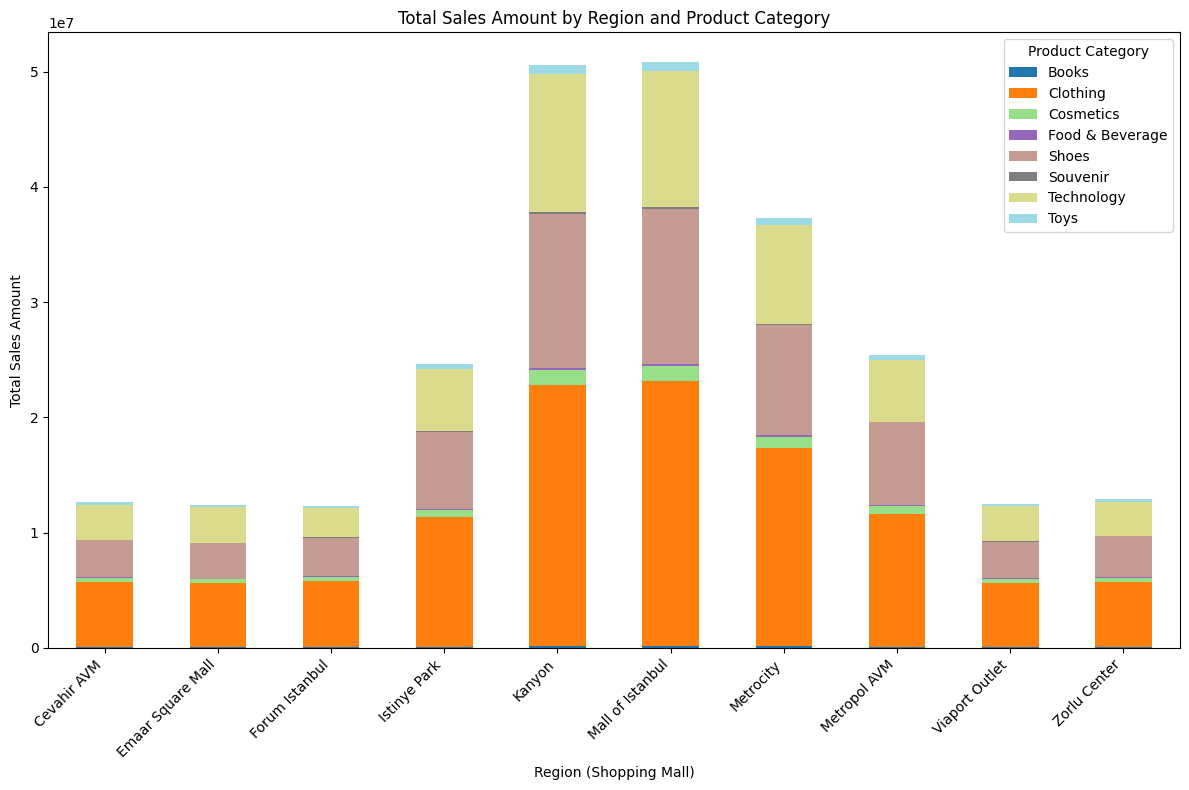

In [13]:


# Step 6: Plot stacked bar chart for region and product category
region_category_sales.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Total Sales Amount by Region and Product Category')
plt.xlabel('Region (Shopping Mall)')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()